In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from data_utils import load_dataset

In [2]:
np.random.seed(100)

In [3]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('iris')

N = x_train.shape[0]
D = x_train.shape[1]

# use the second response
y_train, y_valid, y_test = y_train[:,(1,)], y_valid[:,(1,)], y_test[:,(1,)]

# use both training and validation sets to predict on test set
x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])

# add dummy feature, x_0 = 1
x_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train])
x_test  = np.hstack([np.ones((x_test.shape[0], 1)), x_test])

# define number of iterations to run
num_iterations = 2000

# define learning rates to test
learning_rates = [0.0001, 0.001, 0.002, 0.005, 0.01]

In [4]:
# helper functions
print(np.exp(2))

7.38905609893065


In [5]:
def f_hat_sigmoid(x, w):
    # x is (D+1,1)
    # w is (D+1,1)
    z = w.T.dot(x)
    return 1/(1 + np.exp(-z))

def log_likelihood(y, w, X):
    # y is (N,1)
    # w is (D+1,1)
    # X is (N,D+1)
    N = X.shape[0]
    sum = 0
    for i in range(N):
        summand = y[i]*np.log(f_hat_sigmoid(X[i].T,w)) + (1-y[i])*np.log(1-f_hat_sigmoid(X[i].T,w))
        sum += summand
    return sum

def negative_log_likelihood(y, w, X):
    # y is (N,1)
    # w is (D+1,1)
    # X is (N,D+1)
    return -log_likelihood(y, w, X)

def gradient_log_likelihood(y, w, X):
    # y is (N,1)
    # w is (D+1,1)
    # X is (N,D+1)
    
    N = X.shape[0]
    sum = np.zeros(X.shape[1])
    
    for i in range(N):
        summand = (y[i]-f_hat_sigmoid(X[i].T,w)) * X[i].T
        sum += summand
    return sum

def gradient_negative_log_likelihood(y, w, X):
    # y is (N,1)
    # w is (D+1,1)
    # X is (N,D+1)
    return -gradient_log_likelihood(y, w, X)

In [6]:
# ML estimate of weights: find w that minimizes the negative log likelihood

def gradient_descent_full_batch(x_train, y_train, learning_rates):
    
    rate_dict = {}
    
    for rate in learning_rates:
        
        loss = []
        rate_dict[rate] = []
        
        # initialize weights to zero
        w_k = np.zeros(D+1)
        
        loss.append(negative_log_likelihood(y_train, w_k, x_train))
        
        for i in range(num_iterations):
            gradient_L = gradient_negative_log_likelihood(y_train, w_k, x_train)
            w_k -= rate*gradient_L
            
            loss.append(negative_log_likelihood(y_train, w_k, x_train))
        
        rate_dict[rate].append(loss)
        rate_dict[rate].append(w_k)
                            
    return rate_dict  

def stochastic_gradient_descent(x_train, y_train, learning_rates):
    
    rate_dict = {}
    
    idxs = np.arange(x_train.shape[0])
    
    for rate in learning_rates:
        
        loss = []
        rate_dict[rate] = []
        
        # initialize weights to zero
        w_k = np.zeros(D+1)
        
        loss.append(negative_log_likelihood(y_train, w_k, x_train))
        
        for i in range(num_iterations):
            idx = np.random.choice(idxs)
            gradient_L = gradient_negative_log_likelihood(y_train[idx], w_k, x_train[idx].reshape(1,x_train.shape[1]))
            w_k -= rate*gradient_L
            
            loss.append(negative_log_likelihood(y_train, w_k, x_train))
            
        rate_dict[rate].append(loss)
        rate_dict[rate].append(w_k)
    
    return rate_dict
            

In [7]:
def predict(X, w):
    N = X.shape[0]
    
    y_star = np.empty(N)
    
    for i in range(N):
        y_star[i] = f_hat_sigmoid(X[i].T, w)
    
    return (y_star > 0.5)
    
    

In [8]:
GD_full_batch = gradient_descent_full_batch(x_train, y_train, learning_rates)

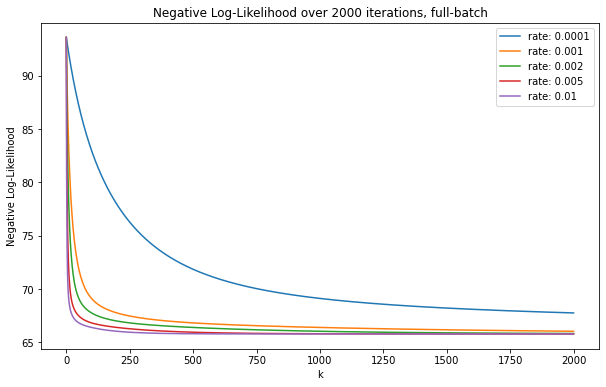

In [9]:
ks = np.arange(num_iterations+1)

plt.figure(figsize=(10,6))
for rate in learning_rates:
    plt.plot(ks, GD_full_batch[rate][0], label="rate: {}".format(rate))
plt.xlabel("k")
plt.ylabel("Negative Log-Likelihood")
plt.title("Negative Log-Likelihood over {} iterations, full-batch".format(num_iterations))
plt.legend(loc='best')
plt.show()

In [10]:
# find test accuracies and test log-likelihoods

print("Tests with full-batch gradient descent:")
for rate in learning_rates:
    print("Learning rate: {}".format(rate))
    y_star = predict(x_test, GD_full_batch[rate][1])
    test_acc = np.mean(y_star == y_test)
    test_log_likelihood = log_likelihood(y_test, GD_full_batch[rate][1], x_test)
    print("\tTest accuracy: {}".format(test_acc))
    print("\tTest log likelihood: {}".format(test_log_likelihood[0]))

Tests with full-batch gradient descent:
Learning rate: 0.0001
	Test accuracy: 0.5555555555555556
	Test log likelihood: -7.06876281567889
Learning rate: 0.001
	Test accuracy: 0.5333333333333333
	Test log likelihood: -7.05623756965187
Learning rate: 0.002
	Test accuracy: 0.5333333333333333
	Test log likelihood: -6.967733069562583
Learning rate: 0.005
	Test accuracy: 0.5555555555555556
	Test log likelihood: -6.917132158606759
Learning rate: 0.01
	Test accuracy: 0.5555555555555556
	Test log likelihood: -6.913033433619077


In [11]:
SGD_batch_1 = stochastic_gradient_descent(x_train, y_train, learning_rates)

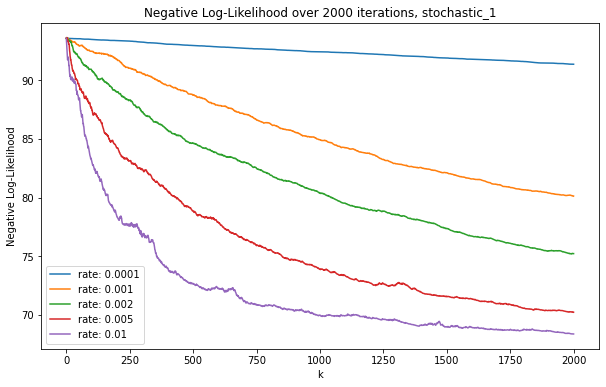

In [12]:
ks = np.arange(num_iterations+1)

plt.figure(figsize=(10,6))
for rate in learning_rates:
    plt.plot(ks, SGD_batch_1[rate][0], label="rate: {}".format(rate))
plt.xlabel("k")
plt.ylabel("Negative Log-Likelihood")
plt.title("Negative Log-Likelihood over {} iterations, stochastic_1".format(num_iterations))
plt.legend(loc='best')
plt.show()

In [13]:
# find test accuracies and test log-likelihoods

print("Tests with stochastic gradient descent, with batch size 1:")
for rate in learning_rates:
    print("Learning rate: {}".format(rate))
    y_star = predict(x_test, SGD_batch_1[rate][1])
    test_acc = np.mean(y_star == y_test)
    test_log_likelihood = log_likelihood(y_test, SGD_batch_1[rate][1], x_test)
    print("\tTest accuracy: {}".format(test_acc))
    print("\tTest log likelihood: {}".format(test_log_likelihood[0]))

Tests with stochastic gradient descent, with batch size 1:
Learning rate: 0.0001
	Test accuracy: 0.5111111111111111
	Test log likelihood: -10.159368073352327
Learning rate: 0.001
	Test accuracy: 0.5777777777777777
	Test log likelihood: -8.79236643347936
Learning rate: 0.002
	Test accuracy: 0.5777777777777777
	Test log likelihood: -8.225973744136125
Learning rate: 0.005
	Test accuracy: 0.5555555555555556
	Test log likelihood: -7.384451900248818
Learning rate: 0.01
	Test accuracy: 0.5555555555555556
	Test log likelihood: -7.1624166783403505
